📊 총 단어 수: 18200253개
📈 고유 단어 수: 1474356개


C:\Users\kdp\AppData\Local\Temp\ipykernel_11464\2121882343.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Greys')


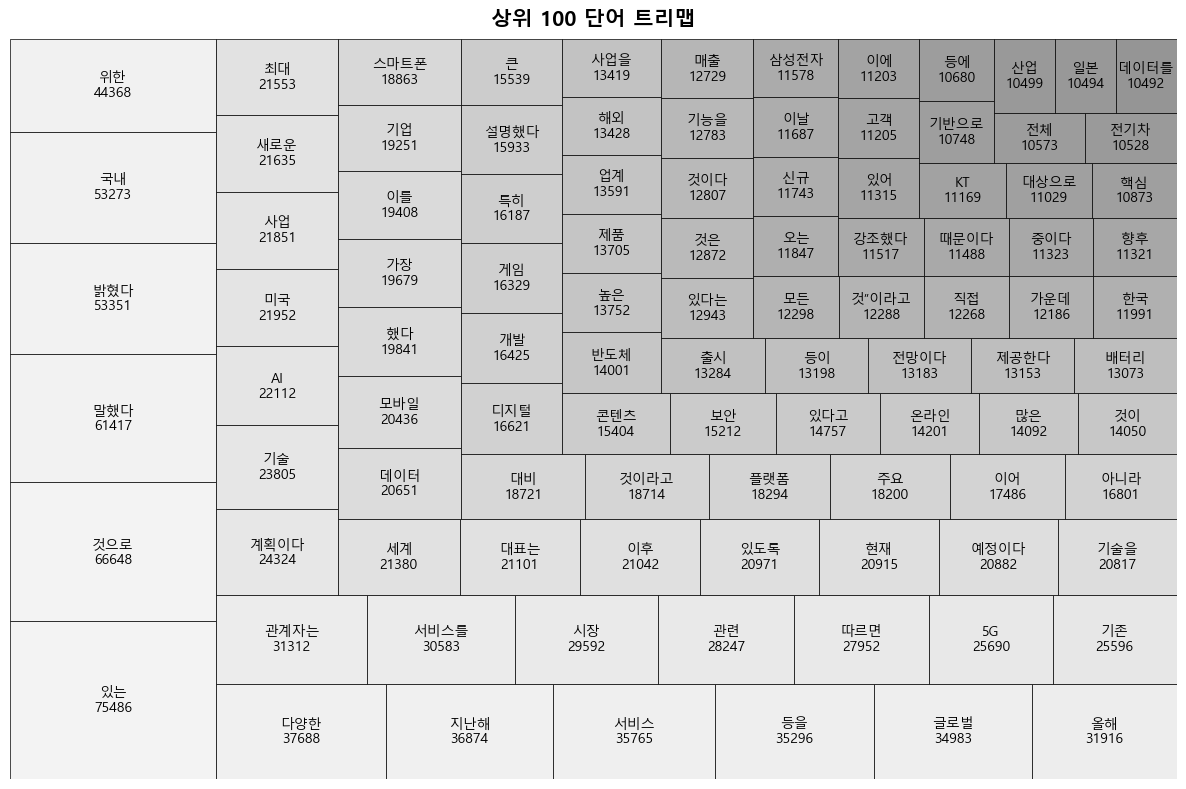

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import squarify
import seaborn as sns
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.cm as cm


# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우
plt.rcParams['axes.unicode_minus'] = False

# 1. 단어 빈도수 계산
def count_word_frequencies(df, columns=['title', 'content']):
    all_text = ''
    for col in columns:
        all_text += ' '.join(df[col].dropna().astype(str)) + ' '
    words = all_text.split()
    word_counts = Counter(words)
    print(f"📊 총 단어 수: {len(words)}개")
    print(f"📈 고유 단어 수: {len(word_counts)}개")
    return word_counts


# 2. 트리맵 시각화 (그레이 계열 + 테두리)

def plot_word_frequency_treemap(word_list, title='단어 빈도수 트리맵'):
    labels = [f"{word}\n{count}" for word, count in word_list]
    sizes = [count for word, count in word_list]

    # ✅ 밝은 회색만 추출 (0.95 ~ 1.0 구간 evenly spaced)
    cmap = cm.get_cmap('Greys')
    color_values = np.linspace(0.1, 0.5, len(sizes))  # 밝은 회색만 사용
    colors = [cmap(val) for val in color_values]

    plt.figure(figsize=(12, 8))
    squarify.plot(
        sizes=sizes,
        label=labels,
        color=colors,
        alpha=1,
        edgecolor='black',  # 테두리로 블록 구분
        linewidth=0.5
    )
    plt.axis('off')
    plt.title(title, fontsize=15, pad=10, weight='bold')
    plt.tight_layout()
    plt.show()
    
# 3. 통합 실행 함수
def show_top_words_treemap(df, top_n=50, columns=['title', 'content']):
    word_counter = count_word_frequencies(df, columns=columns)
    top_words = word_counter.most_common(top_n)
    plot_word_frequency_treemap(top_words, title=f"상위 {top_n} 단어 트리맵")


filepath_train = r'E:\AI_KDT7\NLP\mini\new_news.csv'
fakenews_train_processed = pd.read_csv(filepath_train)

# 전처리된 df 사용
show_top_words_treemap(fakenews_train_processed, top_n=100, columns=['cleaned_title', 'cleaned_Content'])



